In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input


colour_pal = sns.color_palette()
plt.style.use('fivethirtyeight')


In [2]:
ticker = 'SPY'
start = '2010-01-01'
end = '2025-01-01'

In [5]:
df = yf.download(ticker, start=start, end=end)
df.columns = [price for price, _ in df.columns]

C:\Users\Owen\AppData\Local\Temp\ipykernel_8656\521983452.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


# Some initial plots

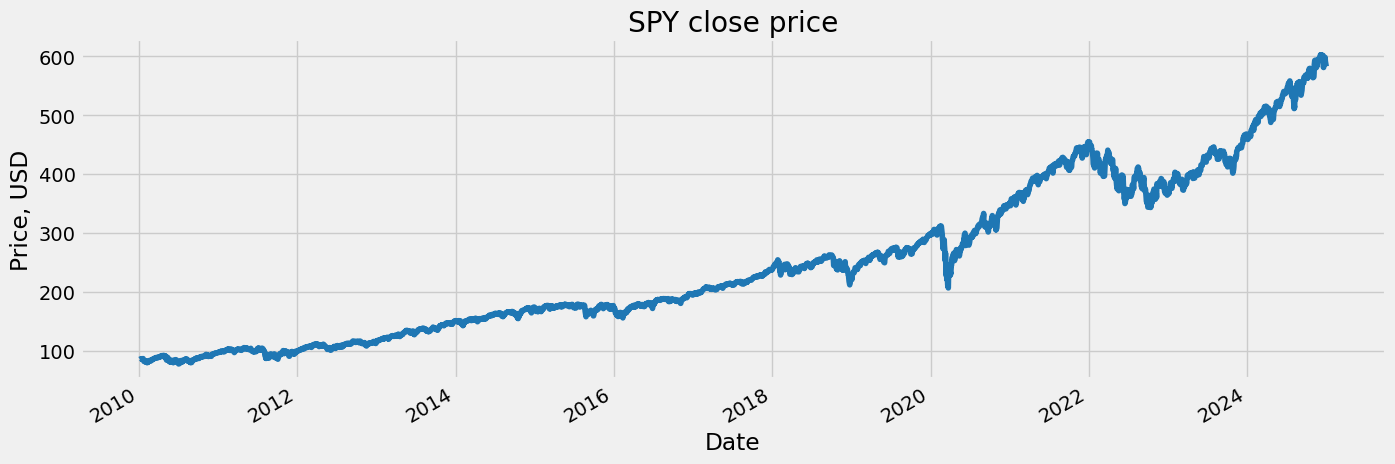

In [8]:
df.Close.plot(style='-', 
              figsize=(15,5), 
              color=colour_pal[0], 
              title=f'{ticker} close price', 
              ylabel='Price, USD')
plt.show()

# Train-test split

In [11]:
date_split = '2023-07-29'

In [13]:
train = df.loc[df.index <= date_split].copy()
test = df.loc[df.index > date_split].copy()

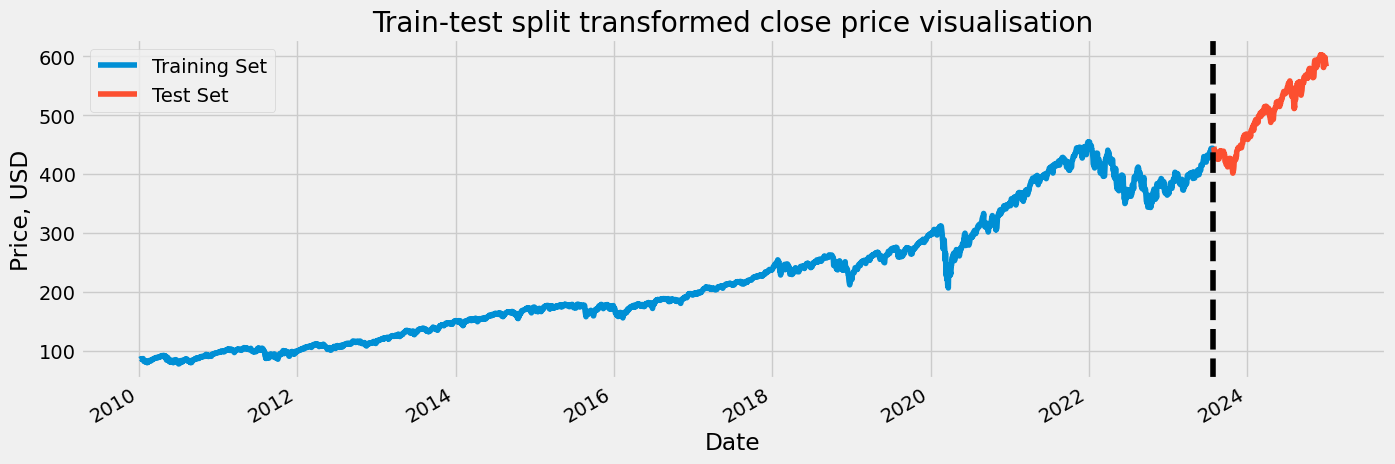

In [70]:
fig, ax = plt.subplots(figsize=(15,5))
train.Close.plot(ax=ax, label='Training Set', title='Train-test split transformed close price visualisation')
test.Close.plot(ax=ax, label='Test Set')
ax.axvline(date_split, color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
ax.set_ylabel('Price, USD')
plt.show()

In [17]:
X_train = []
y_train = []

for i in range(100, len(train)):
    X_train.append(train.iloc[i-100:i, 0])
    y_train.append(train.iloc[i, 0])

X_train = np.array(X_train)
y_train = np.array(y_train)

In [19]:
X_test = []
y_test = []

for i in range(100, len(test)):
    X_test.append(test.iloc[i-100:i, 0])
    y_test.append(test.iloc[i, 0])

X_test = np.array(X_test)
y_test = np.array(y_test)

In [21]:
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

In [23]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train)

# Build model

In [26]:
model = Sequential()

model.add(Input((X_train.shape[1],1)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

model.summary()
model.compile(optimizer='adam', loss='mae', metrics=[RootMeanSquaredError()])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 231,425 (904.00 KB)

 Trainable params: 231,425 (904.00 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model_training = model.fit(X_train, y_train, epochs=20, batch_size=64) 

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - loss: 0.2989 - root_mean_squared_error: 0.4314
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - loss: 0.0875 - root_mean_squared_error: 0.1271
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - loss: 0.0907 - root_mean_squared_error: 0.1320
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - loss: 0.0817 - root_mean_squared_error: 0.1178
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - loss: 0.0824 - root_mean_squared_error: 0.1191
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - loss: 0.0758 - root_mean_squared_error: 0.1092
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - loss: 0.0810 - root_mean_squared_error: 0.1170
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 0.0778 - root_mean_squared_error: 0.1139
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 0.0788 - root_mean_squared_error: 0.1122
Epoch 10/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - loss: 0.0744 - root_mean_squared_err

In [30]:
test_preds = model.predict(X_test)
test_preds = y_scaler.inverse_transform(test_preds)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


In [32]:
test['predictions'] = np.nan
test.loc[test.index[100]:, 'predictions'] = test_preds.flatten()

In [34]:
train_preds = model.predict(X_train)
train_preds = y_scaler.inverse_transform(train_preds)

104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step


In [36]:
train['predictions'] = np.nan
train.loc[train.index[100]:, 'predictions'] = train_preds.flatten()

# Performance evaluation

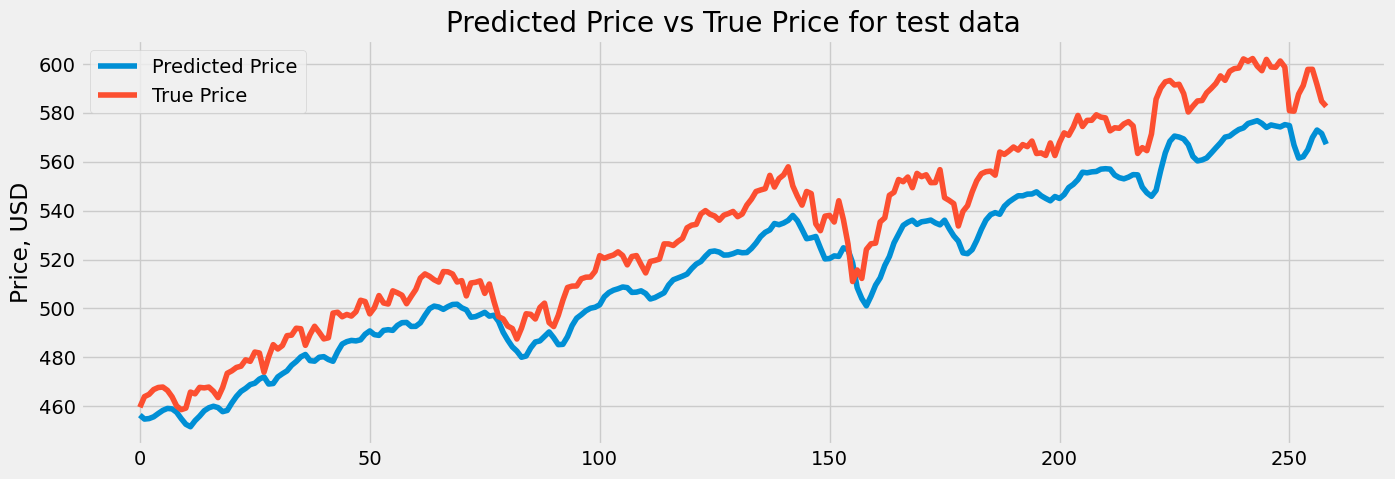

In [74]:
plt.figure(figsize=(15,5))
plt.plot(test_preds, label='Predicted Price')
plt.plot(y_test, label='True Price')
plt.legend()
plt.title('Predicted Price vs True Price for test data')
plt.ylabel('Price, USD')
plt.show()

In [41]:
root_mean_squared_error(y_test, test_preds)

17.160248480391754

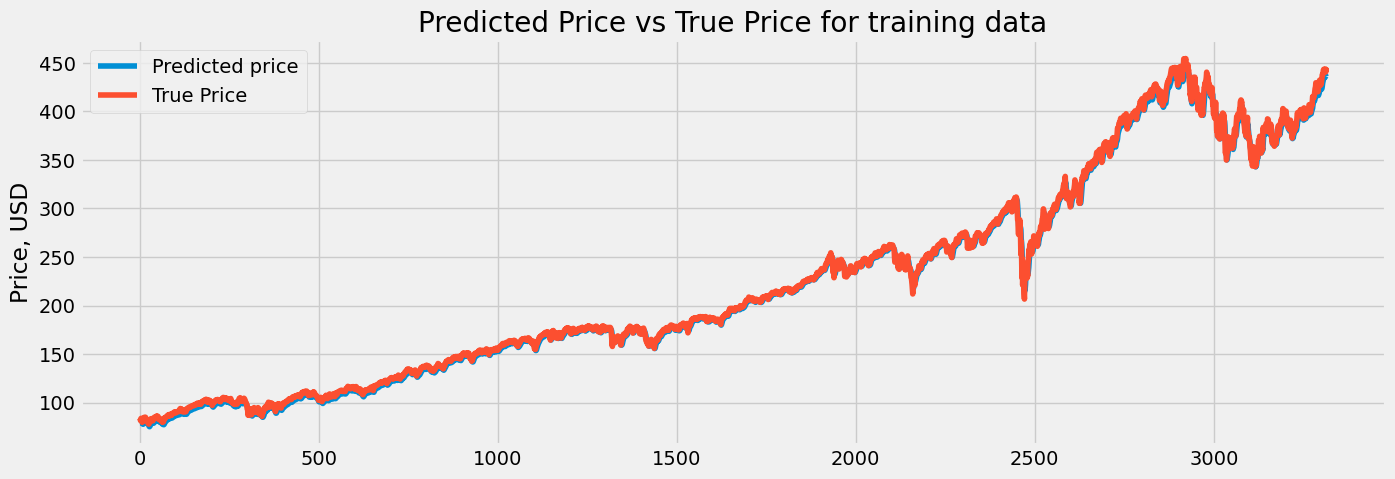

In [76]:
plt.figure(figsize=(15,5))
plt.plot(train_preds, label='Predicted price')
plt.plot(y_scaler.inverse_transform(y_train), label='True Price')
plt.legend()
plt.title('Predicted Price vs True Price for training data')
plt.ylabel('Price, USD')
plt.show()

In [45]:
root_mean_squared_error(y_train, train_preds)

244.71847623819315

In [47]:
test['predicted_returns'] = test.predictions.pct_change()
test['actual_returns'] = test.Close.pct_change()

In [49]:
train['predicted_returns'] = train.predictions.pct_change()
train['actual_returns'] = train.Close.pct_change()

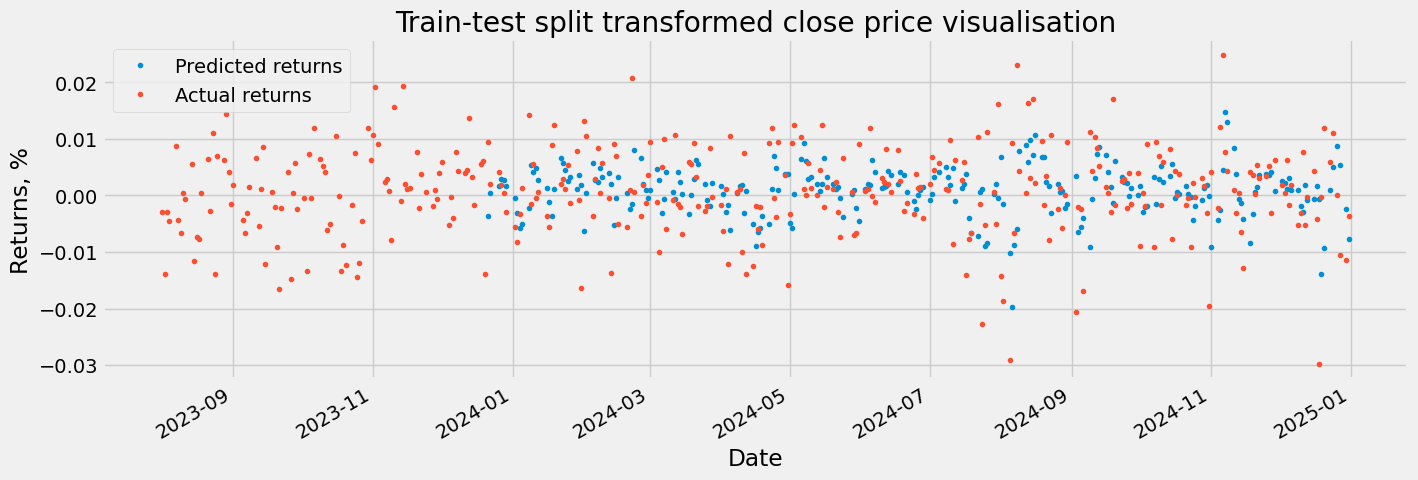

In [82]:
fig, ax = plt.subplots(figsize=(15,5))
test.predicted_returns.plot(ax=ax, label='Predicted returns', style='.', title='Train-test split transformed close price visualisation')
test.actual_returns.plot(ax=ax, label='Actual returns', style='.')
ax.legend()
ax.set_ylabel('Returns, %')
plt.show()

# Implement strategy

In [54]:
tol = 0.005
test['signal'] = test.predicted_returns.apply(lambda x: 1 if x > tol else (-1 if -x > tol else 0))
test['strategy_returns'] = (test.signal * test.actual_returns).cumsum()

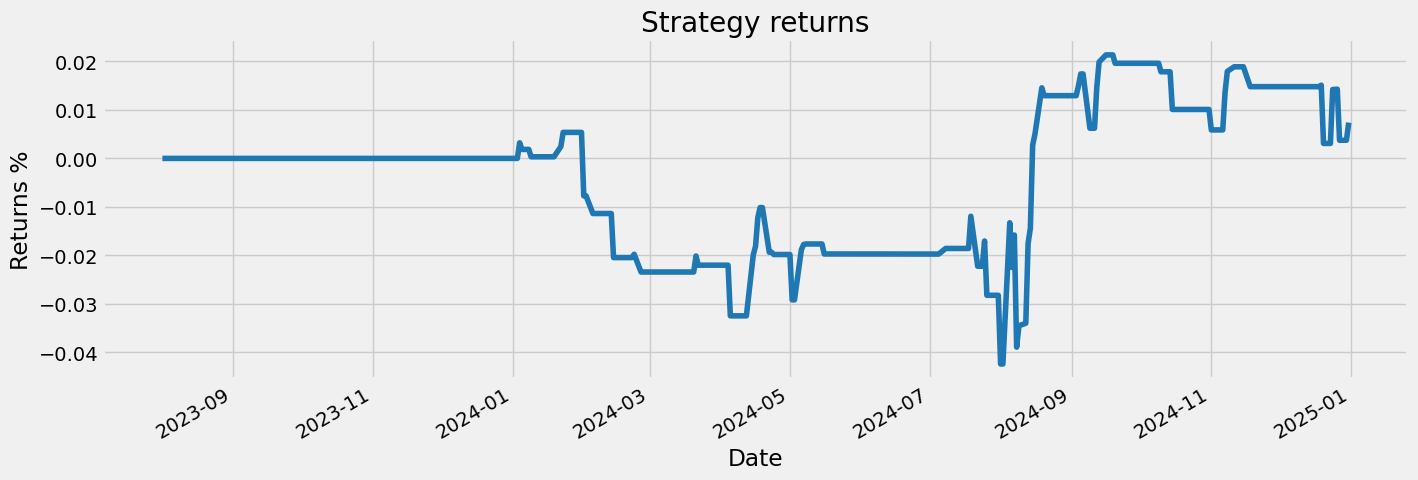

In [56]:
test.strategy_returns.plot(style='-', 
              figsize=(15,5), 
              color=colour_pal[0], 
              title='Strategy returns', 
              ylabel='Returns %')
plt.show()

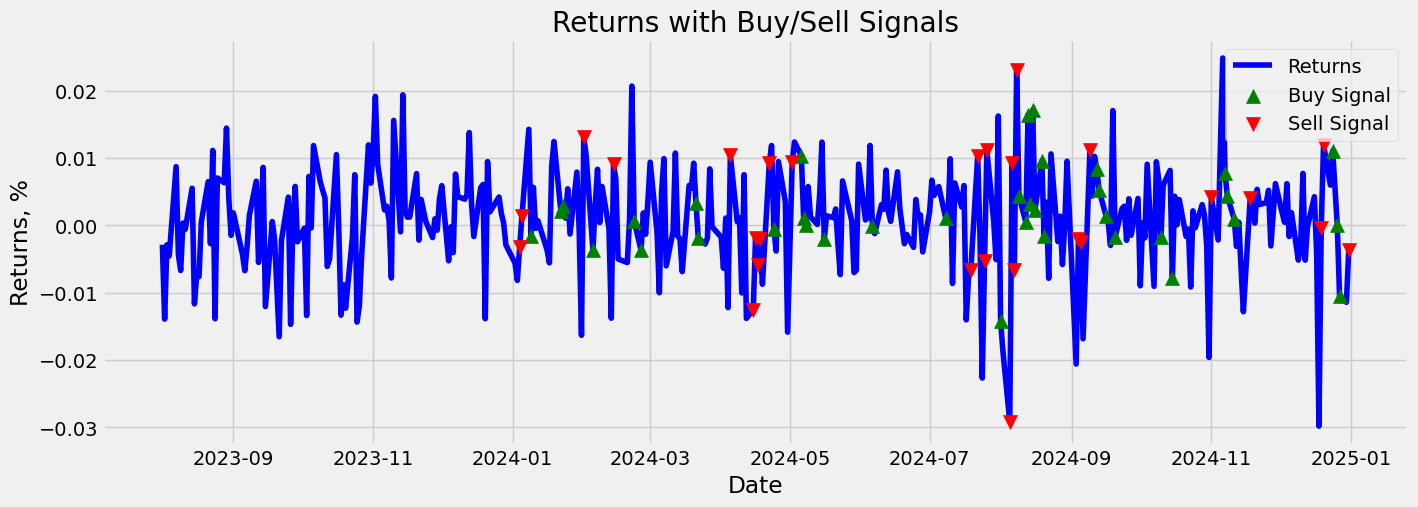

In [84]:
# Create masks for buy and sell signals
buy_mask = test['signal'] == 1
sell_mask = test['signal'] == -1

plt.figure(figsize=(15, 5))

# Plot returns
plt.plot(test.index, test['actual_returns'], label='Returns', color='blue')

# Overlay buy signals
plt.scatter(test.index[buy_mask], test['actual_returns'][buy_mask],
            label='Buy Signal', marker='^', color='green', s=100, zorder=3)

# Overlay sell signals
plt.scatter(test.index[sell_mask], test['actual_returns'][sell_mask],
            label='Sell Signal', marker='v', color='red', s=100, zorder=3)

plt.title('Returns with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Returns, %')
plt.legend()
plt.show()

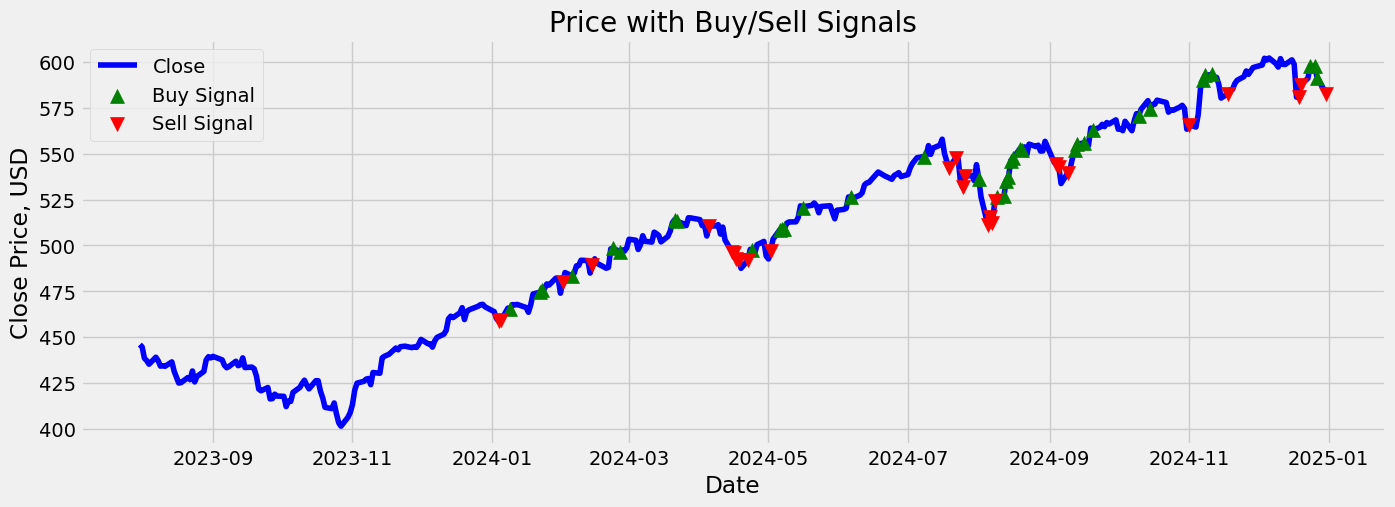

In [86]:
# Create masks for buy and sell signals
buy_mask = test['signal'] == 1
sell_mask = test['signal'] == -1

plt.figure(figsize=(15, 5))

# Plot returns
plt.plot(test.index, test['Close'], label='Close', color='blue')

# Overlay buy signals
plt.scatter(test.index[buy_mask], test['Close'][buy_mask],
            label='Buy Signal', marker='^', color='green', s=100, zorder=3)

# Overlay sell signals
plt.scatter(test.index[sell_mask], test['Close'][sell_mask],
            label='Sell Signal', marker='v', color='red', s=100, zorder=3)

plt.title('Price with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price, USD')
plt.legend()
plt.show()

# Conclusions

The strategy of buy when the model predicts a price increase and sell when the model predicts a price drop appears to have not worked, even though our model seemed to do a good job of predicting the price. It would appear that in our strategy we have fallen victim to the classic 'past performance is not an indication of future performance'. As we can see if we look again the 'Close Price with Buy/Sell Signals' graph, our trading strategy has a habit of shorting the dip and buying the peaks - not ideal!

Why is this? If we look again at out plot of predicted price vs true price for the test data what we can see is that the predicted price graph is approxiately just a lagged version of the true price, made clear in the plot below. 

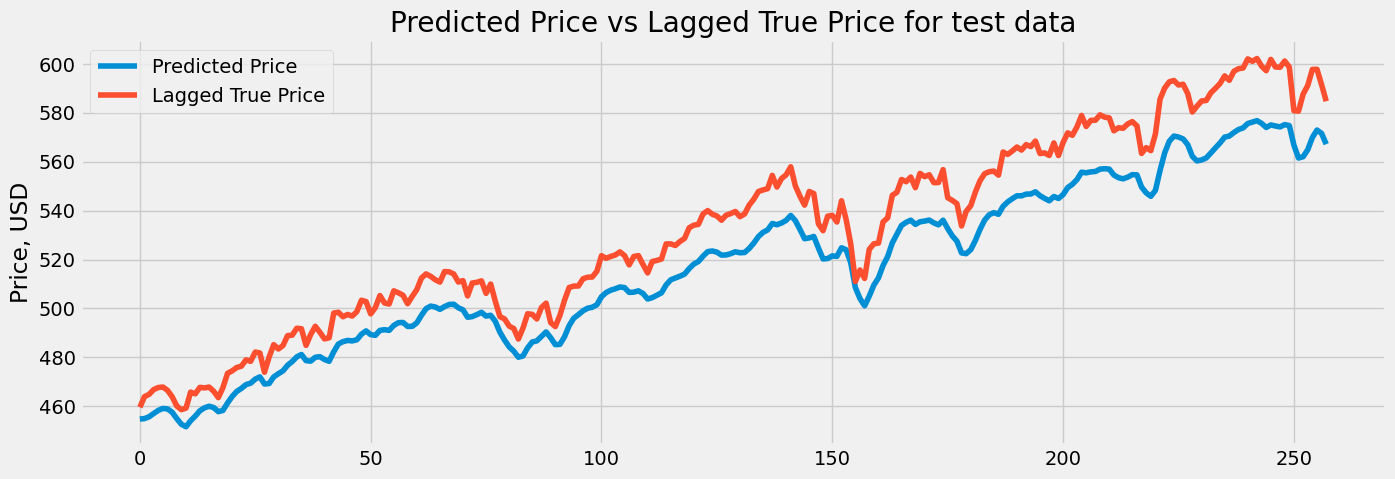

In [88]:
plt.figure(figsize=(15,5))
plt.plot(test_preds[1:], label='Predicted Price')
plt.plot(np.roll(y_test, 1)[1:], label='Lagged True Price')
plt.legend()
plt.title('Predicted Price vs Lagged True Price for test data')
plt.ylabel('Price, USD')
plt.show()

In [98]:
root_mean_squared_error(np.roll(y_test, 1)[1:], test_preds[1:])

16.319883796227998

Perhaps instead it would be appropriate to train the LSTM model with returns as the target value in order to try and extract meaningful trading signals rather than just predicting (approximately) the lagged close price.

Another way we could improve our models performance could be to include technical indicators such as RSI or EMAs, as well as including relevant external data such as VIX statistics and treasury yields.

These will be explored in the next notebook.